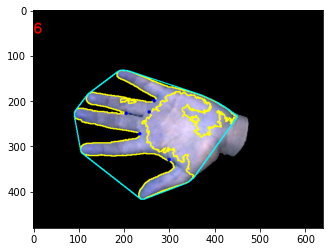

In [9]:
#code obtained from https://medium.com/analytics-vidhya/hand-detection-and-finger-counting-using-opencv-python-5b594704eb08
import cv2
import numpy
from matplotlib import pyplot as plt

img = cv2.imread("hand_1.png")


hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower = numpy.array([0, 48, 80], dtype = "uint8")
upper = numpy.array([20, 255, 255], dtype = "uint8")
skinRegionHSV = cv2.inRange(hsvim, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)


cv2.imwrite("thresh.jpg", thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(img, [contours], -1, (255,255,0), 2)
cv2.imwrite("contours.jpg", img)
hull = cv2.convexHull(contours)
cv2.drawContours(img, [hull], -1, (0,255,255), 2)
cv2.imwrite("hull.jpg", img)
hull = cv2.convexHull(contours, returnPoints = False)
defects = cv2.convexityDefects(contours, hull)

if defects is not None:
    cnt = 0

for i in range(defects.shape[0]):
    s,e,f,d = defects[i][0]
    start = tuple(contours[s][0])
    end = tuple(contours[e][0])
    far = tuple(contours[f][0])
    a = numpy.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
    b = numpy.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
    c = numpy.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
    angle = numpy.arccos((b ** 2 + c **2 - a ** 2) / (2 * b * c))
    if angle <= numpy.pi / 2:
        cnt = cnt + 1
        cv2.circle(img, far, 4, [0,0,255], -1)
if cnt > 0:
    cnt  = cnt + 1
cv2.putText(img, str(cnt), (0,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0), 2, cv2.LINE_AA)

cv2.imwrite("final_result.jpg", img)

imgplot = plt.imshow(img)